In this notebook we will first attempt to reduce the number of features and then we will test the feature performance using several models


In [1]:
import pandas as pd
import numpy as np
import featuretools as ft
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



We first will see how many features we built over the manual engineering process. Here we use a couple of set operations to find the columns that are only in the bureau, only in the previous, and in both dataframes, indicating that there are original features from the application dataframe. Here we are working with a small subset of the data in order to not overwhelm the kernel. This code has been run on the full dataset (we will take a look at the results).


In [2]:
# train_bureau=pd.read_csv("train_bureau_raw.csv")
# test_bureau=pd.read_csv("test_bureau_raw.csv")

# train_previous=pd.read_csv("train_previous_raw.csv")
# test_previous=pd.read_csv("test_previous_raw.csv")

In [3]:
#train_bureau.head()

In [4]:
train_bureau=pd.read_csv("train_bureau_raw.csv", nrows=1000)
test_bureau=pd.read_csv("test_bureau_raw.csv", nrows=1000)

train_previous=pd.read_csv("train_previous_raw.csv", nrows=1000)
test_previous=pd.read_csv("test_previous_raw.csv", nrows=1000)

In [5]:
print(train_bureau.shape) #because we already executed with 1000 rows hence not showing the actual figure
print(test_bureau.shape)
print(train_previous.shape)
print(test_previous.shape)

(1000, 302)
(1000, 301)
(1000, 1166)
(1000, 1165)


In [6]:
train_previous.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_sum_sum,client_installments_counts_mean,client_installments_counts_max,client_installments_counts_min,client_installments_counts_sum,client_counts
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,175783.725,219625.695000,219625.695,219625.695,4.172888e+06,19.000000,19.0,19.0,361.0,19.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1154108.295,453952.220400,1150977.330,80773.380,1.134881e+07,9.160000,12.0,6.0,229.0,25.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,16071.750,21288.465000,21288.465,21288.465,6.386539e+04,3.000000,3.0,3.0,9.0,3.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,994476.690,232499.719688,691786.890,25091.325,3.719996e+06,7.875000,10.0,1.0,126.0,16.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,483756.390,172669.901591,280199.700,18330.390,1.139621e+07,13.606061,17.0,10.0,898.0,66.0


In [7]:
#All columns in a data frame
bureau_columns=list(train_bureau.columns)
previous_columns=list(train_previous.columns) #Saving the columns in the list form

In [8]:
#Lets first take bureau only columns
bureau_features = list(set(bureau_columns) - set(previous_columns))
#previous only columns
previous_features = list(set(previous_columns) - set(bureau_columns))
#original datasets= preious + bureau columns
original_features=list(set(previous_columns)& set(bureau_columns))

print("There are %d original features" %len(original_features))
print("There are %d bureau and bureau balance features" %len(bureau_features))
print("There are %d previous Home Credit Loan features" %len(previous_features))

There are 123 original features
There are 179 bureau and bureau balance features
There are 1043 previous Home Credit Loan features


That gives us the number of features in each dataframe. Now we want to combine the data without creating any duplicate rows.

In [13]:
train_bureau.head()
train_labels = train_bureau['TARGET']
previous_features.append('SK_ID_CURR')

In [14]:

train_ids = train_bureau['SK_ID_CURR']
test_ids = test_bureau['SK_ID_CURR']

# Merge the dataframes avoiding duplicating columns by subsetting train_previous
train = train_bureau.merge(train_previous[previous_features], on = 'SK_ID_CURR')
test = test_bureau.merge(test_previous[previous_features], on = 'SK_ID_CURR')


In [15]:

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (1000, 1345)
Testing shape:  (1000, 1344)


Then we want to one-hot encode the dataframes. This is not quite realistic since we are only working with a sample of the data. This therefore will not create as many columns as one-hot encoding the entire dataset would. I provide the actual numbers after applying this to the full data below the code cell. An important note in the code cell is where we align the dataframes by the columns. This ensures we have the same columns in the training and testing datasets.

In [16]:


# One hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Match the columns in the dataframes
train, test = train.align(test, join = 'inner', axis = 1)
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)



Training shape:  (1000, 1447)
Testing shape:  (1000, 1447)


In [17]:
train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0


When we do this to the full dataset, we get 1447 features.

# Correct Mistake
When doing manual feature engineering, I accidentally created some columns derived from the client id, SK_ID_CURR. As this is a unique identifier for each client, it should not have any predictive power, and we would not want to build a model trained on this "feature". Let's remove any columns built on the SK_ID_CURR.

In [20]:
cols_with_id = [x for x in train.columns if 'SK_ID_CURR' in x]
cols_with_bureau_id = [x for x in train.columns if 'SK_ID_BUREAU' in x]
cols_with_previous_id = [x for x in train.columns if 'SK_ID_PREV' in x]
print('There are %d columns that contain SK_ID_CURR' % len(cols_with_id))
print('There are %d columns that contain SK_ID_BUREAU' % len(cols_with_bureau_id))
print('There are %d columns that contain SK_ID_PREV' % len(cols_with_previous_id))

train = train.drop(cols_with_id, axis=1)
test = test.drop(cols_with_id, axis=1)
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

There are 49 columns that contain SK_ID_CURR
There are 0 columns that contain SK_ID_BUREAU
There are 0 columns that contain SK_ID_PREV
Training shape:  (1000, 1398)
Testing shape:  (1000, 1398)


After applying this to the full dataset, we end up with 1398 features. More features might seem like a good thing, and they can be if they help our model learn. However, irrelevant features, and highly correlated features, can prevent the model from learning and decrease generalization performance on the testing data. For that reason, we like to remove highly collinear variables.

# Remove Collinear Variables
Collinear variables are those which are highly correlated with one another. These can decrease the model's availablility to learn, decrease model interpretability, and decrease generalization performance on the test set. Clearly, these are three things we want to increase, so removing collinear variables is a useful step. We will establish an admittedly arbitrary threshold for removing collinear variables, and then remove one out of any pair of variables that is above that threshold.

The code below identifies the highly correlated variables based on the absolute magnitude of the Pearson correlation coefficient being greater than 0.9. Again, this is not entirely accurate since we are dealing with such a limited section of the data. This code is for illustration purposes, but if we read in the entire dataset, it would work 

## Identify Correlated Variables

In [21]:
#threshold for removing correlated variables
threshold=0.9
#Absolute value correlation matrix
corr_matrix=train.corr().abs()
corr_matrix.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
CNT_CHILDREN,1.000000,0.055960,0.036836,0.055732,0.035851,0.060210,0.303782,0.218535,0.211766,0.036960,...,0.096914,0.064817,0.024544,0.019465,0.005586,0.030986,0.001443,0.027967,0.004500,0.020465
AMT_INCOME_TOTAL,0.055960,1.000000,0.429317,0.491143,0.439981,0.184339,0.088743,0.208663,0.130682,0.045634,...,0.033574,0.064520,0.020186,0.058210,0.060465,0.080291,0.000218,0.043426,0.107476,0.030645
AMT_CREDIT,0.036836,0.429317,1.000000,0.797209,0.986046,0.074287,0.065100,0.116515,0.027876,0.022994,...,0.005136,0.011202,0.007313,0.060005,0.009795,0.098314,0.018123,0.009507,0.075595,0.009483
AMT_ANNUITY,0.055732,0.491143,0.797209,1.000000,0.799121,0.106685,0.019480,0.139220,0.059163,0.024020,...,0.011107,0.022890,0.017907,0.084270,0.022107,0.133969,0.036801,0.032497,0.098291,0.036308
AMT_GOODS_PRICE,0.035851,0.439981,0.986046,0.799121,1.000000,0.073531,0.058535,0.115613,0.034500,0.030878,...,0.002397,0.020737,0.000716,0.069845,0.014077,0.094081,0.012866,0.019114,0.082543,0.000395


In [22]:
#Upper triangle of correlation matrix
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
CNT_CHILDREN,NaN,0.05596,0.036836,0.055732,0.035851,0.060210,0.303782,0.218535,0.211766,0.036960,...,0.096914,0.064817,0.024544,0.019465,0.005586,0.030986,0.001443,0.027967,0.004500,0.020465
AMT_INCOME_TOTAL,NaN,NaN,0.429317,0.491143,0.439981,0.184339,0.088743,0.208663,0.130682,0.045634,...,0.033574,0.064520,0.020186,0.058210,0.060465,0.080291,0.000218,0.043426,0.107476,0.030645
AMT_CREDIT,NaN,NaN,NaN,0.797209,0.986046,0.074287,0.065100,0.116515,0.027876,0.022994,...,0.005136,0.011202,0.007313,0.060005,0.009795,0.098314,0.018123,0.009507,0.075595,0.009483
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.799121,0.106685,0.019480,0.139220,0.059163,0.024020,...,0.011107,0.022890,0.017907,0.084270,0.022107,0.133969,0.036801,0.032497,0.098291,0.036308
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,0.073531,0.058535,0.115613,0.034500,0.030878,...,0.002397,0.020737,0.000716,0.069845,0.014077,0.094081,0.012866,0.019114,0.082543,0.000395


In [23]:
#Select columns that are above the threshold
to_drop=[column for column in upper.columns if any(upper[column]>threshold)]
print("These %d are the columns to be removed" %len(to_drop))

These 584 are the columns to be removed


In [24]:
train=train.drop(train[to_drop], axis=1)

In [25]:
train.shape

(1000, 814)

In [26]:
test=test.drop(test[to_drop], axis=1)
test.shape

(1000, 814)



Applying this on the entire dataset results in collinear features removed. The total dataset size is therefore . This has reduced the number of features singificantly, but it is likely still too many. At this point, we can test the dataset to see how it does in a fairly simple LightGBM model. This will serve as a baseline before we do more feature selection. Moreover, we can actually use the feature importances returned from the LightGBM model for subsequent feature selection!


In [27]:
# Train missing values (in percent)
train_missing = (train.isnull().sum() / len(train)).sort_values(ascending = False)
train_missing.head()

client_credit_AMT_PAYMENT_CURRENT_min_mean           0.798
client_credit_CNT_DRAWINGS_OTHER_CURRENT_min_min     0.795
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_min      0.795
client_credit_CNT_DRAWINGS_OTHER_CURRENT_min_mean    0.795
client_credit_AMT_DRAWINGS_OTHER_CURRENT_min_max     0.795
dtype: float64

In [28]:
# Test missing values (in percent)
test_missing = (test.isnull().sum() / len(test)).sort_values(ascending = False)
test_missing.head()

client_credit_CNT_DRAWINGS_OTHER_CURRENT_min_min     0.788
client_credit_AMT_DRAWINGS_POS_CURRENT_mean_mean     0.788
client_credit_AMT_DRAWINGS_OTHER_CURRENT_mean_min    0.788
client_credit_CNT_DRAWINGS_ATM_CURRENT_max_max       0.788
client_credit_AMT_PAYMENT_CURRENT_min_mean           0.788
dtype: float64

In [29]:
# Identify missing values above threshold
train_missing = train_missing.index[train_missing > 0.75]
test_missing = test_missing.index[test_missing > 0.75]

all_missing = list(set(set(train_missing) | set(test_missing)))
print('There are %d columns with more than 75%% missing values' % len(all_missing))

There are 16 columns with more than 75% missing values


In [38]:
# # # Need to save the labels because aligning will remove this column
# # train_labels = train["TARGET"]
# train_ids = train['SK_ID_CURR']
# test_ids = test['SK_ID_CURR']

# train = pd.get_dummies(train.drop(train[all_missing], axis=1))
# test = pd.get_dummies(test.drop(test[all_missing]))

# train, test = train.align(test, join = 'inner', axis = 1)

# print('Training set full shape: ', train.shape)
# print('Testing set full shape: ' , test.shape)

In [40]:
import lightgbm as lgb

from sklearn.model_selection import train_test_split

In [41]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train.shape[1]) #here 1 indicates that we are choosing the number of columns

In [46]:
# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [47]:
# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[25]	valid_0's auc: 0.72305
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[30]	valid_0's auc: 0.679149


In [48]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
26,EXT_SOURCE_3,31.0
25,EXT_SOURCE_2,29.5
6,DAYS_EMPLOYED,11.5
3,AMT_ANNUITY,10.5
111,bureau_DAYS_CREDIT_max,7.5


In [49]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

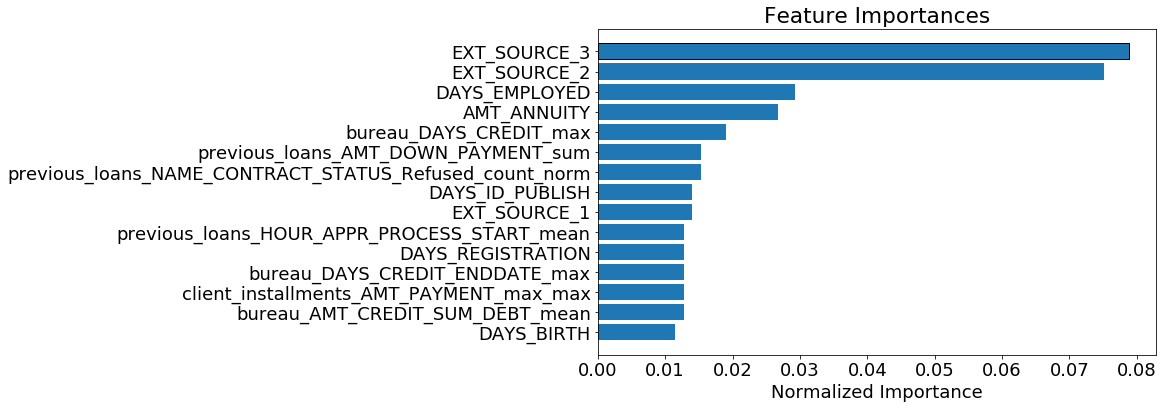

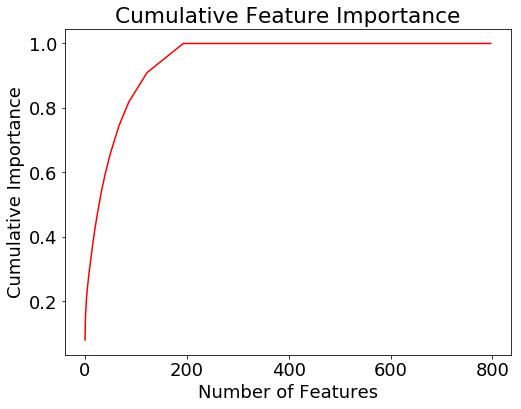

120 features required for 0.90 of cumulative importance


In [50]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [51]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 604 features with 0.0 importance


,feature,importance
310,client_credit_NAME_CONTRACT_STATUS_Completed_c...,0.0
313,previous_loans_DAYS_FIRST_DRAWING_mean,0.0
314,client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_sum,0.0
318,previous_loans_CHANNEL_TYPE_Car dealer_count,0.0
797,EMERGENCYSTATE_MODE_Yes,0.0


Well, it also looks like many of the features we made have literally 0 importance. For the gradient boosting machine, features with 0 importance are not used at all to make any splits. Therefore, we can remove these features from the model with no effect on performance (except for faster training).

In [53]:


train = train.drop(train[zero_features], axis=1)
test = test.drop(test[zero_features], axis=1)

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)



Training shape:  (1000, 194)
Testing shape:  (1000, 210)


At this point, we can re-run the model to see if it identifies any more features with zero importance. In a way, we are implementing our own form of recursive feature elimination. Since we are repeating work, we should probably put the zero feature importance identification code in a function.

In [54]:
def identify_zero_importance_features(train, train_labels, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the 
    feature importances from a gradient boosting model. 
    
    Parameters
    --------
    train : dataframe
        Training features
        
    train_labels : np.array
        Labels for training data
        
    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """
    
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(train.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'auc', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [55]:
second_round_zero_features, feature_importances = identify_zero_importance_features(train, train_labels)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[30]	valid_0's auc: 0.732896
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[30]	valid_0's auc: 0.679149

There are 0 features with 0.0 importance


There are now no 0 importance features left (I guess we should have expected this). If we want to remove more features, we will have to start with features that have a non-zero importance. One way we could do this is by retaining enough features to account for a threshold percentage of importance, such as 95%. At this point, let's keep enough features to account for 95% of the importance. Again, this is an arbitrary decision!

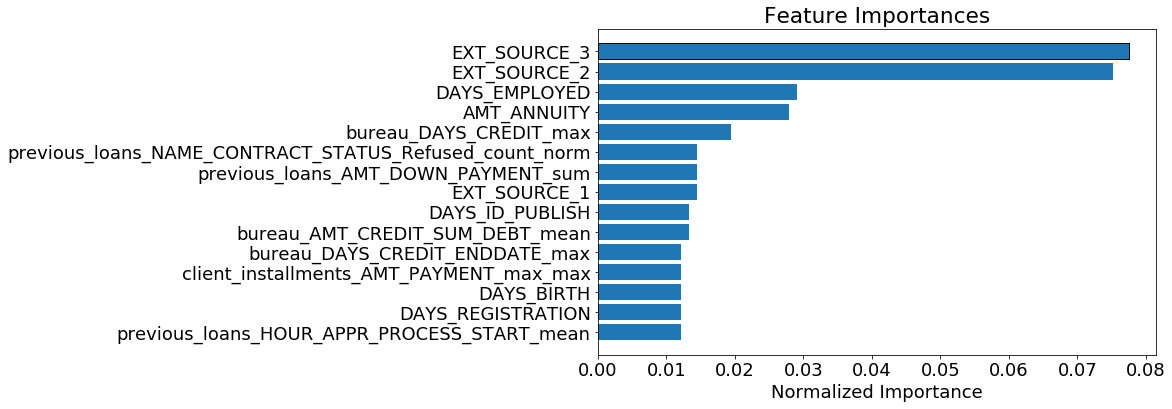

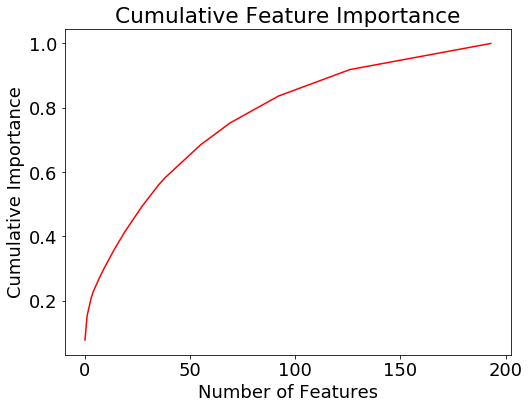

153 features required for 0.95 of cumulative importance


In [56]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)



We can keep only the features needed for 95% importance. This step seems to me to have the greatest chance of harming the model's learning ability, so rather than changing the original dataset, we will make smaller copies. Then, we can test both versions of the data to see if the extra feature removal step is worthwhile.


In [58]:


# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
train_small = train[features_to_keep]
test_small = test[features_to_keep]



In [59]:
train_small['TARGET'] = train_labels
train_small['SK_ID_CURR'] = train_ids
test_small['SK_ID_CURR'] = test_ids

train_small.to_csv('m_train_small.csv', index = False)
test_small.to_csv('m_test_small.csv', index = False)

# Test New Featuresets
The last step of feature removal we did seems like it may have the potential to hurt the model the most. Therefore we want to test the effect of this removal. To do that, we can use a standard model and change the features.

We will use a fairly standard LightGBM model, similar to the one we used for feature selection. The main difference is this model uses five-fold cross validation for training and we use it to make predictions. There's a lot of code here, but that's because I included documentation and a few extras (such as feature importances) that aren't strictly necessary. For now, understanding the entire model isn't critical, just know that we are using the same model with two different datasets to see which one performs the best.

In [60]:
# Imports used by model
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import gc

In [68]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(features['SK_ID_CURR', 'TARGET'], axis=1)
    test_features = test_features.drop(train['SK_ID_CURR'], axis=1)
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', boosting_type='goss',
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [70]:


# train['TARGET'] = train_labels
# train['SK_ID_CURR'] = train_ids
# test['SK_ID_CURR'] = test_ids

# submission, feature_importances, metrics = model(train, test)

#https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/Feature%20Selection.ipynb


# https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/Feature%20Selection.ipynb